<a href="https://colab.research.google.com/github/payalkumari8/Multivariate-Statistics/blob/main/SLR_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing naumpy and pandas libraries to read the data

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Read the given CSV file, and view some sample records
advertising = pd.read_csv("Company_data.csv")
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
# Shape of our dataset
advertising.shape

# Info our dataset
advertising.info()

# Describe our dataset
advertising.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


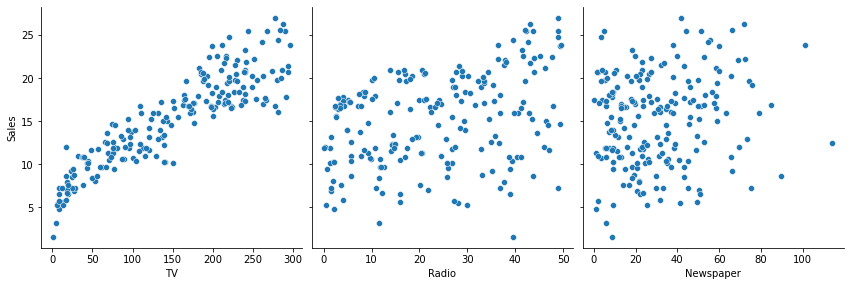

In [ ]:

# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns

# Using pairplot we'll visualize the data for correlation
sns.pairplot(advertising, x_vars=['TV', 'Radio','Newspaper'], 
             y_vars='Sales', size=4, aspect=1, kind='scatter')
plt.show()

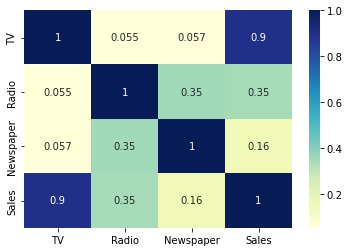

In [ ]:

# Visualizing the data using heatmap
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [ ]:
# Creating X and y
X = advertising['TV']
y = advertising['Sales']

In [ ]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3)

In [ ]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [ ]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const    6.960597
TV       0.055833
dtype: float64

In [ ]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     612.3
Date:                Wed, 08 Sep 2021   Prob (F-statistic):           1.36e-52
Time:                        13:31:28   Log-Likelihood:                -314.49
No. Observations:                 140   AIC:                             633.0
Df Residuals:                     138   BIC:                             638.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9606      0.388     17.919      0.000       6.193       7.729
TV             0.0558      0.002     24.745      0.000       0.051       0.060
==============================================================================
Omnibus:                        0.096   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.953   Jarque-Bera (JB):                0.219
Skew:                           0.050   Prob(JB):                        0.896
Kurtosis:                       2.834   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#?sm.OLS

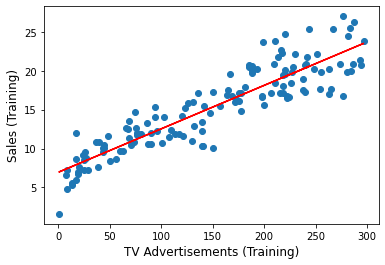

In [ ]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.params[0] + lr.params[1]*X_train, 'r')
plt.ylabel('Sales (Training)', fontsize=12)
plt.xlabel('TV Advertisements (Training)', fontsize=12)
plt.show()

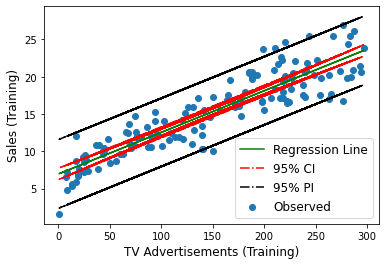

In [ ]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

# Visualizing the confidence interval
from scipy import stats
n = len(res)
SSE = np.sum(res**2)
MSE = SSE/(n-2)
y_pred = lr.params[0] + lr.params[1]*X_train

# Misc values
t_fac = stats.t.ppf(1-0.025, 198)
x_bar = np.mean(X_train)
s_xx = np.sum((X_train-x_bar)**2)

c_low_train = y_train_pred - t_fac*np.sqrt(MSE)*np.sqrt(1/n+(X_train-x_bar)**2/s_xx)
c_up_train = y_train_pred + t_fac*np.sqrt(MSE)*np.sqrt(1/n+(X_train-x_bar)**2/s_xx)

p_low_train = y_train_pred - t_fac*np.sqrt(MSE)*np.sqrt(1+1/n+(X_train-x_bar)**2/s_xx)
p_up_train = y_train_pred + t_fac*np.sqrt(MSE)*np.sqrt(1+1/n+(X_train-x_bar)**2/s_xx)

plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, 'g')
plt.plot(X_train, c_low_train, 'r-.')
plt.plot(X_train, p_low_train, 'k-.')
plt.ylabel('Sales (Training)', fontsize=12)
plt.xlabel('TV Advertisements (Training)', fontsize=12)
plt.legend(['Regression Line','95% CI', '95% PI','Observed'],fontsize=12)
plt.plot(X_train, c_up_train, 'r-.')
plt.plot(X_train, p_up_train, 'k-.')
plt.show()

In [ ]:
PI_CI_df = pd.DataFrame()
PI_CI_df['Sales_y'] = y_train
PI_CI_df['TV_x'] = X_train
PI_CI_df['beta_0'] = lr.params[0]
PI_CI_df['beta_1'] = lr.params[1]
PI_CI_df['Sales_pred'] = y_pred
PI_CI_df['t_multiplier'] = stats.t.ppf(1-0.025, 198)
PI_CI_df['MSE'] = MSE
PI_CI_df['S_xx'] = s_xx
PI_CI_df['Lower_CI_tail'] = c_low_train
PI_CI_df['Upper_CI_tail'] = c_up_train
PI_CI_df['Lower_PI_tail'] = p_low_train
PI_CI_df['Upper_PI_tail'] = p_up_train
PI_CI_df

,Sales_y,TV_x,beta_0,beta_1,Sales_pred,t_multiplier,MSE,S_xx,Lower_CI_tail,Upper_CI_tail,Lower_PI_tail,Upper_PI_tail
52,22.6,216.4,6.960597,0.055833,19.042884,1.972017,5.307875,1.042606e+06,18.555578,19.530190,14.473528,23.612240
183,26.2,287.6,6.960597,0.055833,23.018202,1.972017,5.307875,1.042606e+06,22.291605,23.744799,18.417171,27.619233
175,27.0,276.9,6.960597,0.055833,22.420788,1.972017,5.307875,1.042606e+06,21.734148,23.107427,17.825897,27.015678
193,19.6,166.8,6.960597,0.055833,16.273561,1.972017,5.307875,1.042606e+06,15.881469,16.665653,11.713377,20.833746
168,17.1,215.4,6.960597,0.055833,18.987051,1.972017,5.307875,1.042606e+06,18.502472,19.471630,14.417985,23.556117
...,...,...,...,...,...,...,...,...,...,...,...,...
190,10.8,39.5,6.960597,0.055833,9.166005,1.972017,5.307875,1.042606e+06,8.545781,9.786229,4.580569,13.751441
38,10.1,43.1,6.960597,0.055833,9.367004,1.972017,5.307875,1.042606e+06,8.759279,9.974729,4.783242,13.950766
22,5.6,13.2,6.960597,0.055833,7.697594,1.972017,5.307875,1.042606e+06,6.981795,8.413392,3.098255,12.296932
159,12.9,131.7,6.960597,0.055833,14.313819,1.972017,5.307875,1.042606e+06,13.922229,14.705408,9.753677,18.873960


In [ ]:
stats.t.ppf(1-0.025, 198)*np.sqrt(MSE)*np.sqrt(1/n+(X_train[52]-x_bar)**2/s_xx)

0.4873057903849264

In [ ]:
19.043-0.487

18.556

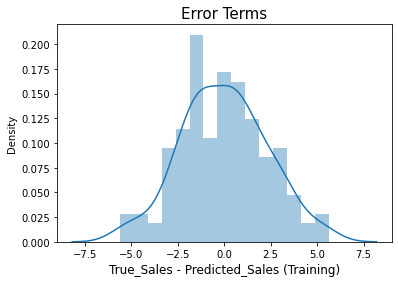

In [ ]:
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15, kde=True)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('True_Sales - Predicted_Sales (Training)', fontsize = 12)
plt.show()

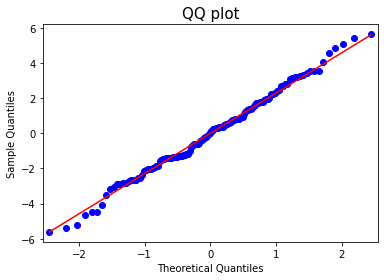

In [ ]:
# QQ-plot: Looking to see if the residuals follows a normal distribution using standardized normal dist quantiles
sm.qqplot(res, line ='s')
plt.title('QQ plot', fontsize=15)
plt.show()

In [ ]:
#?sm.qqplot

In [ ]:
#?sns.distplot

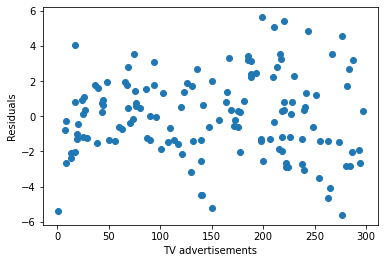

In [ ]:
# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.ylabel('Residuals')
plt.xlabel('TV advertisements')
plt.show()

In [ ]:
# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.ylabel('Residuals')
plt.xlabel('Sample number')
plt.show()

In [ ]:
#?plt.scatter

In [ ]:

# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

60      9.947669
11     18.947968
191    11.175997
14     18.356136
114    11.326747
7      13.671738
185    18.406386
79     13.437239
61     21.549791
177    16.463394
199    19.919464
74     18.875384
35     23.191285
150    22.632954
40     18.266803
143    12.800741
6      10.171001
13     12.404326
98     23.135452
28     20.851877
33     21.789873
26     14.939150
53     17.155724
89     13.091073
148     9.082255
158     7.613844
76      8.496007
117    11.226247
141    17.775472
57     14.565068
105    14.659984
50     18.116054
15     17.870388
187    17.630306
82     11.164831
88     11.890661
70     18.076971
18     10.824249
47     20.354962
32     12.387576
163    16.089312
49     10.695832
56      7.368178
78      7.262095
155     7.189512
34     12.303826
66      8.719340
146    20.366129
104    20.260046
179    16.206561
132     7.429595
165    20.053463
43     18.512469
87     13.141323
39     19.690548
119     8.043759
90     14.458985
3      15.419314
124    19.7742

In [ ]:
?lr.predict

In [ ]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.8006792589602305

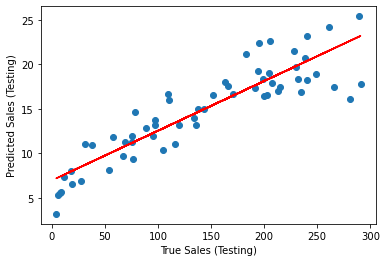

In [ ]:
# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.xlabel('True Sales (Testing)')
plt.ylabel('Predicted Sales (Testing)')
plt.show()